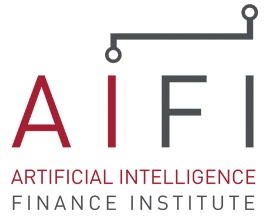


# Bootcamp - Python and Coding - Primer

# Getting Data from the Web


## [json](https://docs.python.org/3.6/library/json.html)

Nowadays, data often accumulates in traffic between computers. A format which has established itself as a standard for communication between different systems, programming languages, frameworks is json. You probably know json from somewhere else, have programmed an *API* which returns json, or similar.  

The json package in Python is part of the *standard library*. So you don't need to install anything to work with json.

# Imports

In [1]:
import json
import requests
import re
import html2text
import pandas as pd

In [2]:
# in python data can be stored in nested dicts and lists:
some_data = [
    {'object': 'flat', 'sqm': 70, 'location': 'NYC', 'price': 900000 },
    {'object': 'house', 'sqm': 180, 'location': 'LA', 'price': 1500000 },
]

In [3]:
# we can directly transform such objects to valid json
json_data = json.dumps(some_data)
json_data

'[{"object": "flat", "sqm": 70, "location": "NYC", "price": 900000}, {"object": "house", "sqm": 180, "location": "LA", "price": 1500000}]'

In [4]:
# and of course also load it back into python lists and strings
json.loads(json_data)

[{'object': 'flat', 'sqm': 70, 'location': 'NYC', 'price': 900000},
 {'object': 'house', 'sqm': 180, 'location': 'LA', 'price': 1500000}]

## [requests](https://docs.python.org/3/library/urllib.request.html)

Numerous sources of information are available as freely accessible resources on servers and behind APIs. To access this data, the Python package `requests` is perfectly suited. This is how it works:

In [5]:
r = requests.get('https://www.aifinanceinstitute.com/')

In [6]:
# status of the request
r.status_code

200

In [7]:
# encoding of strings
r.encoding

'utf-8'

In [8]:
# get html headers
r.headers

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Content-Type': 'text/html; charset=utf-8', 'Content-Encoding': 'gzip', 'Expires': '-1', 'Vary': 'Accept-Encoding', 'Set-Cookie': 'dnn_IsMobile=False; path=/; HttpOnly, language=en-US; path=/; HttpOnly, .ASPXANONYMOUS=N77N0sgy21tUcuvwwGMk8HCa06iIZn5cWn72f4jySJNZi6cP6-Uja7IXDllfmlS1h8pPBzYYyTzkhVQWjfNOkKHzbNmkSLRp2Gpsir5Et5y8q5ym0; expires=Thu, 13-Oct-2022 08:15:22 GMT; path=/; HttpOnly, dnn_IsMobile=False; path=/; HttpOnly, language=en-US; path=/; HttpOnly, .ASPXANONYMOUS=N77N0sgy21tUcuvwwGMk8HCa06iIZn5cWn72f4jySJNZi6cP6-Uja7IXDllfmlS1h8pPBzYYyTzkhVQWjfNOkKHzbNmkSLRp2Gpsir5Et5y8q5ym0; expires=Thu, 13-Oct-2022 08:15:22 GMT; path=/; HttpOnly, dnn_IsMobile=False; path=/; HttpOnly, language=en-US; path=/; HttpOnly, .ASPXANONYMOUS=N77N0sgy21tUcuvwwGMk8HCa06iIZn5cWn72f4jySJNZi6cP6-Uja7IXDllfmlS1h8pPBzYYyTzkhVQWjfNOkKHzbNmkSLRp2Gpsir5Et5y8q5ym0; expires=Thu, 13-Oct-2022 08:15:22 GMT; path=/; HttpOnly, __RequestVerificationToken=9VGwWAy3_CSav

In [9]:
# the first 10 rows of the content
r.content.decode('utf-8').rsplit('\n')[:10]

['<!DOCTYPE html>\r',
 '<html  lang="en-US">\r',
 '<head id="Head"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type" /><title>\r',
 '\tAIFI\r',
 '</title><meta id="MetaDescription" name="description" content="The Artificial Intelligence Finance Institute’s (AIFI) mission is to be the world’s leading educator in the application of artificial intelligence to investment management, capital markets and risk." /><meta id="MetaRobots" name="robots" content="INDEX, FOLLOW" /><link href="https://fonts.googleapis.com/css?family=Raleway:300,400,500,700&amp;cdv=118" type="text/css" rel="stylesheet"/><link href="/Resources/Shared/stylesheets/dnndefault/7.0.0/default.css?cdv=118" type="text/css" rel="stylesheet"/><link href="/DesktopModules/OpenContent/module.css?cdv=118" type="text/css" rel="stylesheet"/><link href="/DesktopModules/OpenContent/js/lib/eonasdan-bootstrap-datetimepicker/build/css/bootstrap-datetimepicker.min.css?cdv=118" type="text/css" rel="stylesheet"/><link href="

### Download Data from URL 

In [10]:
# downloading a data file from google sheets, but could be any other link to any csv file
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQTGWI6Z1VUmh36xY6gum7EBo5ag0ZAqlesamHBPkzPr-8ht949aw_4kiTIgZexFJXvNoPXo53bHeef/pub?output=csv'

In [11]:
data = requests.get(url)

In [12]:
data.status_code

200

In [13]:
data.content[:1000]

b'ticker,date,close\r\nAAPL,1980-12-12,0.1014988136\r\nAAPL,1980-12-15,0.09620322328\r\nAAPL,1980-12-16,0.08914243625\r\nAAPL,1980-12-17,0.09133128023\r\nAAPL,1980-12-18,0.0940143793\r\nAAPL,1980-12-19,0.0997336168\r\nAAPL,1980-12-22,0.1046055598\r\nAAPL,1980-12-23,0.1090185517\r\nAAPL,1980-12-24,0.1147377892\r\nAAPL,1980-12-26,0.1253289698\r\nAAPL,1980-12-29,0.1270941665\r\nAAPL,1980-12-30,0.1239874202\r\nAAPL,1980-12-31,0.1204923307\r\nAAPL,1981-01-02,0.1217985763\r\nAAPL,1981-01-05,0.1191507811\r\nAAPL,1981-01-06,0.1138551909\r\nAAPL,1981-01-07,0.1090185517\r\nAAPL,1981-01-08,0.1067944038\r\nAAPL,1981-01-09,0.1125489453\r\nAAPL,1981-01-12,0.1116310429\r\nAAPL,1981-01-13,0.1076770022\r\nAAPL,1981-01-14,0.1081359534\r\nAAPL,1981-01-15,0.1103247973\r\nAAPL,1981-01-16,0.109442199\r\nAAPL,1981-01-19,0.1160440348\r\nAAPL,1981-01-20,0.1125489453\r\nAAPL,1981-01-21,0.1147377892\r\nAAPL,1981-01-22,0.1160440348\r\nAAPL,1981-01-23,0.1156203876\r\nAAPL,1981-01-26,0.1138551909\r\nAAPL,1981-01-27

In [14]:
data.encoding

'ISO-8859-1'

In [15]:
# write the data to a csv file (in binary form)
with open('stock_data.csv', 'wb') as fid:
    fid.write(data.content)

In [16]:
# and read it now with pandas from the csv-file
df = pd.read_csv("stock_data.csv")

In [18]:
df.head()

,ticker,date,close
0,AAPL,1980-12-12,0.101499
1,AAPL,1980-12-15,0.096203
2,AAPL,1980-12-16,0.089142
3,AAPL,1980-12-17,0.091331
4,AAPL,1980-12-18,0.094014


### API-Access 

**Example:** [https://lyricsovh.docs.apiary.io](https://lyricsovh.docs.apiary.io)

In [19]:
lyrics = requests.get('https://api.lyrics.ovh/v1/coldplay/yellow')

In [20]:
lyrics.status_code

200

In [21]:
lyrics.content

b'{"lyrics":"Paroles de la chanson Yellow par Coldplay\\r\\n[Chris Martin]\\nLook at the stars\\nLook how they shine for you\\nAnd everything you do\\nYeah, they were all yellow\\nI came along\\nI wrote a song for you\\nAnd all the things you do\\nAnd it was called \\"Yellow\\"\\nSo then I took my turn\\nOh, what a thing to have done\\nAnd it was all yellow\\n\\n[Chris, Jonny & Will]\\n(Aah) Your skin, oh yeah, your skin and bones\\n(Ooh) Turn into something beautiful\\n\\n(Aah) You know, you know I love you so\\nYou know I love you so\\n\\n[Chris Martin]\\nI swam across\\nI jumped across for you\\nOh, what a thing to do\\n\'Cause you were all yellow\\nI drew a line\\nI drew a line for you\\nOh, what a thing to do\\nAnd it was all yellow\\n\\n[Chris, Jonny & Will]\\n(Aah) Your skin, oh yeah, your skin and bones\\n(Ooh) Turn into something beautiful\\n(Aah) And you know\\nFor you, I\'d bleed myself dry\\n\\nFor you, I\'d bleed myself dry\\n\\n[ Chris Martin]\\nIt\'s true, look how they 

In [22]:
lyrics.encoding

'utf-8'

In [23]:
song = lyrics.content.decode('utf-8')

In [24]:
print(json.loads(song)['lyrics'].replace('\r', '')[:500]+' ...')

Paroles de la chanson Yellow par Coldplay
[Chris Martin]
Look at the stars
Look how they shine for you
And everything you do
Yeah, they were all yellow
I came along
I wrote a song for you
And all the things you do
And it was called "Yellow"
So then I took my turn
Oh, what a thing to have done
And it was all yellow

[Chris, Jonny & Will]
(Aah) Your skin, oh yeah, your skin and bones
(Ooh) Turn into something beautiful

(Aah) You know, you know I love you so
You know I love you so

[Chris Martin]
 ...


## Custom Web-Crawler

the following code is a web scraping function that retrieves text content from a given URL and extracts relevant information based on a list of tags. The text content is converted from HTML to plain text using the `html2text` library, and only the text containing the relevant tags is kept. The filtered text is then appended to a Pandas DataFrame and returned as a tuple. Additionally, the code checks if the next line after the relevant text is a link, and if so, it is also appended to the filtered text.

In [3]:
def scrape_text_content(url):
    cols = ['text']
    df = pd.DataFrame(columns = cols)
    headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers=headers)
    # Convert HTML to plain text
    html = response.text
    text = html2text.html2text(html)
    # Keep only text with relevant tags
    tags = ['iPhones', 'revenue', 'loss', 'losses']
    filtered_text = ''
    para_split = text.split('\n\n')
    for i, para in enumerate(para_split):
        if any(tag in para for tag in tags):
            df = df.append({'text': para},ignore_index=True)
            filtered_text += para + '\n\n'
            
    # Check if the next line is a link
    try:
        next_line = para_split[i+3].strip()
        print(next_line)
        if next_line.startswith('[') and '](/' in next_line:
            filtered_text += next_line + '\n\n\n\n'
    except IndexError:
        pass
    return df, filtered_text

In [4]:
url = "https://www.marketwatch.com/story/apple-earnings-fall-short-on-underwhelming-sales-of-iphones-and-macs-11675373982?mod=home-page"
df, text = scrape_text_content(url)

print(text)

##  Stock pares back losses despite wide miss on revenue

Apple Inc. posted its largest revenue decline in more than six years amid
underwhelming sales of iPhones, Macs and wearables, but its shares pared back
most of their initial losses in after-hours trading Thursday after the company
blamed its smartphone declines on supply issues.

Apple’s [AAPL, +3.71%](/investing/stock/AAPL?mod=MW_story_quote) iPhone
revenue fell to $65.8 billion in the fiscal first quarter from $71.6 billion a
year before, whereas analysts tracked by FactSet were looking for $67.8
billion. The performance comes after Apple [warned in
November](https://www.marketwatch.com/story/apple-warns-that-iphone-14-pro-
and-pro-max-shipments-will-be-affected-by-china-production-
issues-11667777870?mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline)
that its iPhone 14 Pro and Pro Max shipments would be impacted by pandemic-
fueled production constraints at a major Foxconn [2354,
-0.18%](/investing/s